<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/week5featureeng/d1insurance/Feature_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#it is how u failed 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score
import category_encoders as ce

In [4]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
data = pd.read_csv("insurance.csv")

In [6]:
df = data.copy()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


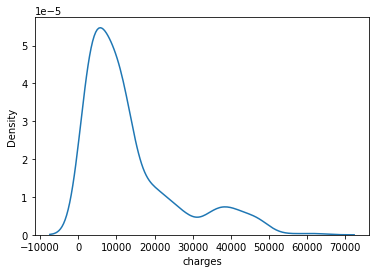

In [9]:
sns.kdeplot(data=data, x="charges")

In [19]:
#Seperate the features and target
X,y = data.iloc[:,:-1], data.iloc[:,-1]
Xv,yv = data.iloc[:,:-1].values, data.iloc[:,-1].values
Xl,Xo = X.copy(),X.copy()
yo,yl = y.copy(),y.copy()

In [20]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Xl.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
Xl.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])
Xl.iloc[:, 5] = le.fit_transform(X.iloc[:, 5])

In [21]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X.iloc[:, 1] = le.fit_transform(X.iloc[:, 1])
X.iloc[:, 4] = le.fit_transform(X.iloc[:, 4])
X.iloc[:, 5] = le.fit_transform(X.iloc[:, 5])

In [29]:

# OneHot Encoding:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(handle_unknown = "use_encoded_values"), [1,4,5])], remainder='passthrough')
X_train= np.array(ct.fit_transform(X_train))

In [17]:
#category_encoders




In [22]:
#split your data for test

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [23]:
Xo_train, Xo_test,  yo_train, yo_test = train_test_split(Xo,yo, test_size = 0.2, random_state = 1)

In [24]:
Xl_train, Xl_test,  yl_train, yl_test = train_test_split(Xl,yl, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler               
sc = StandardScaler()
Xo_train = sc.fit_transform(Xo_train)
Xo_test = sc.transform(Xo_test)   
Xl_train = sc.fit_transform(Xl_train)
Xl_test = sc.transform(Xl_test)  
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)  

In [32]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [25]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
y_pred = regressor.fit(X_train, y_train).predict(X_test)

In [26]:
accuracy = regressor.score(X_test, y_test)
accuracy

-0.11574944298002698

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
confusion_matrix(y_true, y_pred)

In [20]:
# fit model no training data one hot
modelx = XGBClassifier()
modelo = modelx.fit(Xo_train, yo_train)

In [82]:
# fit model no training data one hot label
modell = modelx.fit(Xl_train, yl_train)

In [83]:
y_predlx = modell.predict(Xl_test)

In [24]:
print("Number of mismathed charges out of a total %d points : %d respect to modelo (one hot, standard scaler and XGboost)"
      % (Xo_test.shape[0], (yo_test != y_predox).sum()))

Number of mismathed charges out of a total 268 points : 268 respect to modelo (one hot, standard scaler and XGboost)


In [22]:
y_predox = modelo.predict(Xo_test)


In [48]:
y_predlx = modell.predict(Xl_test)

print("Number of mismathed charges out of a total %d points : %d respect to Label encoder ande XGB"
      % (Xl_test.shape[0], (yl_test != y_predlx).sum()))

Number of mismathed charges out of a total 268 points : 268 respect to Label encoder ande XGB


In [ ]:
accuracy = accuracy_score(yo_test, y_predox)

In [ ]:
randomtree = RandomForestClassifier(n_estimators=100)
y_predorf = randomtree.fit(Xo_train, yo_train).predict(Xo_test)

In [ ]:
y_predlrf = randomtree.fit(Xl_train, yl_train).predict(Xl_test)